# Stock Market Prediction using LSTM

## Loading Libraries

In [3]:
import os
import pandas as pd
from datetime import datetime
import dateutil.parser
import numpy as np
from scipy import stats

## Reading in Dataset

In [4]:
stockDF = pd.read_csv('Data/NVDA.csv')

In [5]:
stockDF.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,...,BBP_5_2.0,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD
0,1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041794,2.714688e+09,-1.515741e+09
1,1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038928,3.225168e+09,-1.115475e+09
2,1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038092,2.881968e+09,-1.378866e+09
3,1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040242,2.637600e+09,-1.322429e+09
4,1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,NaN,NaN,...,0.382024,NaN,NaN,NaN,NaN,NaN,NaN,0.040839,2.410080e+09,-1.368213e+09


In [6]:
stockDF.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,BBP_5_2.0,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD
count,6519.000000,6519.000000,6519.000000,6519.000000,6.519000e+03,6519.000000,6519.000000,6504.000000,6502.000000,6505.000000,...,6515.000000,6510.000000,6506.000000,6468.000000,6442.000000,6511.000000,6494.000000,6493.000000,6.519000e+03,6.519000e+03
mean,8.020093,8.165426,7.859800,8.019078,6.011666e+08,0.000028,0.003298,55.249787,55.256394,53.659832,...,0.525701,7.998559,-44.760957,7.319923,7.029460,7.927898,7.765403,8.051034,6.304518e+10,4.250518e+09
std,21.933909,22.318302,21.477293,21.911962,4.310678e+08,0.000359,0.141323,28.777906,27.976263,12.863010,...,0.289974,21.829483,30.792249,19.615406,18.497342,21.621990,21.030985,21.949964,4.695740e+10,2.740060e+10
min,0.032003,0.032600,0.030569,0.031286,1.968000e+07,0.000000,0.000000,0.897614,1.436657,13.025450,...,0.001766,0.032197,-100.000000,0.032928,0.035704,0.032659,0.033197,0.031286,-3.288085e+10,-4.061282e+10
25%,0.256401,0.263662,0.249906,0.256363,3.406040e+08,0.000000,0.000000,28.563801,29.472183,44.456678,...,0.257349,0.257352,-72.618881,0.255843,0.258465,0.257357,0.258446,0.258847,2.892337e+10,-1.554332e+10
50%,0.435343,0.441577,0.428000,0.435343,5.030360e+08,0.000000,0.000000,58.690440,58.728880,53.969908,...,0.552125,0.435371,-41.556720,0.434354,0.429803,0.434373,0.435310,0.436762,5.407756e+10,-6.813211e+09
75%,4.453363,4.502290,4.390022,4.461058,7.320360e+08,0.000000,0.000000,81.986328,81.199449,62.747636,...,0.789045,4.454813,-16.429651,4.339996,4.247920,4.422878,4.373019,4.480048,1.018728e+11,2.720408e+10
max,149.339720,152.879470,146.249911,148.869751,9.230856e+09,0.010000,10.000000,99.440797,98.434083,91.420713,...,0.999637,146.570243,0.000000,138.360468,125.347041,145.010006,142.490188,148.869751,1.638066e+11,6.994093e+10


## Checking for missing data

In [7]:
stockDF.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
STOCHk_14_3_3,15
STOCHd_14_3_3,17


There are a lot of missing data from the NVIDIA dataset. Since this is stock data, which is a time-series data, a popular approach would to use forward fill since it gets the previous known data and preserves the trends in the data.
Forward fill only works if the missing data is not the first set of data in the dataset. If the missing data is the first rows, a reasonable approach would be to use backward fill which would get the earliest available data to fill the gaps. I do forward fill first then backward fill

In [8]:
stockDF = stockDF.ffill()
stockDF = stockDF.bfill()

## DateTime to Date Conversion

In [9]:
stockDF['Date'] = pd.to_datetime(stockDF['Date'],utc=True)

In [10]:
stockDF['Date_Only'] = stockDF['Date'].dt.date

In [11]:
stockDF.drop(columns=['Date'],inplace=True)

In [12]:
stockDF.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD,Date_Only
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.041794,2.714688e+09,-1.515741e+09,1999-01-22
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.038928,3.225168e+09,-1.115475e+09,1999-01-25
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.038092,2.881968e+09,-1.378866e+09,1999-01-26
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.040242,2.637600e+09,-1.322429e+09,1999-01-27
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.040839,2.410080e+09,-1.368213e+09,1999-01-28


Above converts the include Date feature into the datetime column to be able to use it to create more features

## Feature Engineering

### Creating separate features for month, day and year

In [13]:
stockDF['dateParsed'] = pd.to_datetime(stockDF['Date_Only'])
stockDF['year'] = stockDF['dateParsed'].dt.year
stockDF['month'] = stockDF['dateParsed'].dt.month
stockDF['day'] = stockDF['dateParsed'].dt.day
stockDF['quarter'] = stockDF['dateParsed'].dt.quarter
stockDF.drop(columns=['Date_Only'],inplace=True)

Create separate month, day, and year feature to facilitate data analysis and modeling

### Calculating Price Gaps

In [14]:
stockDF['priceGap'] = (stockDF['Close'] - stockDF['Open'].shift(1)) / stockDF['Close'].shift(1) #compares closing price with previous days numbers

In [15]:
stockDF['daily_return'] = stockDF['Close'].pct_change() #getting daily returns
stockDF['log_return'] = np.log(stockDF['Close'] / stockDF['Close'].shift(1)) #getting log returns

### Looking at the volatiility of the market data between 5, 10, 20, 30 day intervals

In [16]:
for window in [5, 10, 20, 30]:
      stockDF[f'volatility_{window}d'] = stockDF['log_return'].rolling(window).std() * np.sqrt(252)

Stocks are always very volatile, so this checks how volatile the stock is during a 5, 10, 20, 30 day period

### Calculating volume changes

In [17]:
stockDF['volume_change'] = stockDF['Volume'].pct_change()
stockDF['volume_ma_ration_5'] = stockDF['Volume'] / stockDF['Volume'].rolling(5).mean()
stockDF['volume_ma_ration_10'] = stockDF['Volume'] / stockDF['Volume'].rolling(10).mean()

Calculates volume changes in past 5 or 10 days

### Calculating volume relationship with price

In [18]:
stockDF['volume_price_ratio'] = stockDF['Close'] / stockDF['Volume']

Created a feature to see if there's a relationship with the closing price of a stock with the stock volume

### Interaction between RSI and Stochastic

In [19]:
if 'RSI_14' in stockDF.columns and 'STOCHk_14_3_3' in stockDF.columns:
        stockDF['rsi_stoch_diff'] = stockDF['RSI_14'] - stockDF['STOCHk_14_3_3']
        stockDF['rsi_stoch_ratio'] = stockDF['RSI_14'] / np.where(stockDF['STOCHk_14_3_3'] == 0, 0.001, stockDF['STOCHk_14_3_3'])


RSI is the Relative Strength Index. It's a technical indicator that measures the speed and change of price movements. It would show analysts whether a stock is oversold or over bought.  

The formula for RSI is: 100 - (100/(1+RS))
RS is relative strength which is calculated by: average_gain/average_loss

Stochastic is an indicator that compares the closing price to the price range over a certain period of time.

The code above creates features to see the differences and the ratios of the RSI and stochastic indicators to see any interesting interactions

### Interaction with Bollinger Bands

In [20]:
if all(col in stockDF.columns for col in ['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0']):
        stockDF['bb_lower_dist'] = (stockDF['Close'] - stockDF['BBL_5_2.0']) / stockDF['BBL_5_2.0']
        stockDF['bb_upper_dist'] = (stockDF['BBU_5_2.0'] - stockDF['Close']) / stockDF['Close']
        stockDF['bb_mid_dist'] = (stockDF['Close'] - stockDF['BBM_5_2.0']) / stockDF['BBM_5_2.0']

Bollinger Bands is an indicator that helps traders estimate the volatility of the stocks they are observing. The bands widens when the stock becomes more volatile.

The above code checks for different interactions with the different bollinger bands.

### MACD crossover signals

In [21]:
if all(col in stockDF.columns for col in ['MACD_12_26_9', 'MACDs_12_26_9']):
      stockDF['macd_crossover'] = np.where(
          (stockDF['MACD_12_26_9'] > stockDF['MACDs_12_26_9']) &
          (stockDF['MACD_12_26_9'].shift(1) <= stockDF['MACDs_12_26_9'].shift(1)),
          1, 0
      )
      stockDF['macd_crossunder'] = np.where(
          (stockDF['MACD_12_26_9'] < stockDF['MACDs_12_26_9']) &
          (stockDF['MACD_12_26_9'].shift(1) >= stockDF['MACDs_12_26_9'].shift(1)),
          1, 0
      )

MACD stands for moving average convergence/divergence. It helps traders/investors identify the price trends.

### RSI overbought/oversold signals

In [22]:
if 'RSI_14' in stockDF.columns:
        stockDF['rsi_overbought'] = np.where(stockDF['RSI_14'] > 70, 1, 0)
        stockDF['rsi_oversold'] = np.where(stockDF['RSI_14'] < 30, 1, 0)

Created a feature to indicator whether a stock is overbought or oversold. An rsi above 70 indicators overbought and those below 30 is oversold

In [23]:
stockDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,volume_price_ratio,rsi_stoch_diff,rsi_stoch_ratio,bb_lower_dist,bb_upper_dist,bb_mid_dist,macd_crossover,macd_crossunder,rsi_overbought,rsi_oversold
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,1.385617e-11,8.979286,1.205068,0.047054,0.105881,-0.029570,0,0,0,0
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,8.140552e-11,8.979286,1.205068,0.156747,0.001011,0.072096,0,0,0,0
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,1.116883e-10,8.979286,1.205068,0.066991,0.085217,-0.011092,0,0,0,0
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,1.563715e-10,8.979286,1.205068,0.063672,0.088603,-0.014168,0,0,0,0
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,1.674228e-10,8.979286,1.205068,0.060328,0.092036,-0.017267,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,137.360001,140.169998,135.210007,139.309998,184905200,0.0,0.0,28.162572,36.724356,48.915180,...,7.534131e-07,20.752608,1.736886,0.044723,0.054696,-0.005908,0,0,0,0
6515,137.080002,138.440002,135.800003,137.339996,159211400,0.0,0.0,29.111055,30.127867,46.402587,...,8.626266e-07,17.291533,1.593985,0.026848,0.044408,-0.009048,0,0,0,0
6516,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0,29.485599,28.919742,42.697825,...,5.798763e-07,13.212226,1.448091,0.009737,0.049956,-0.019758,0,0,0,0
6517,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0,20.867842,26.488165,40.182117,...,5.547358e-07,19.314275,1.925552,0.011139,0.065471,-0.026506,0,0,0,0


In [24]:
stockDF = stockDF.ffill()
stockDF = stockDF.bfill()

Did another forward fill and backwards fill to fillna some empty cells

## Moving Average Graphs

In [25]:
ma100 = stockDF.Close.rolling(100).mean()
ma200 = stockDF.Close.rolling(200).mean()

In [26]:
import matplotlib.pyplot as plt

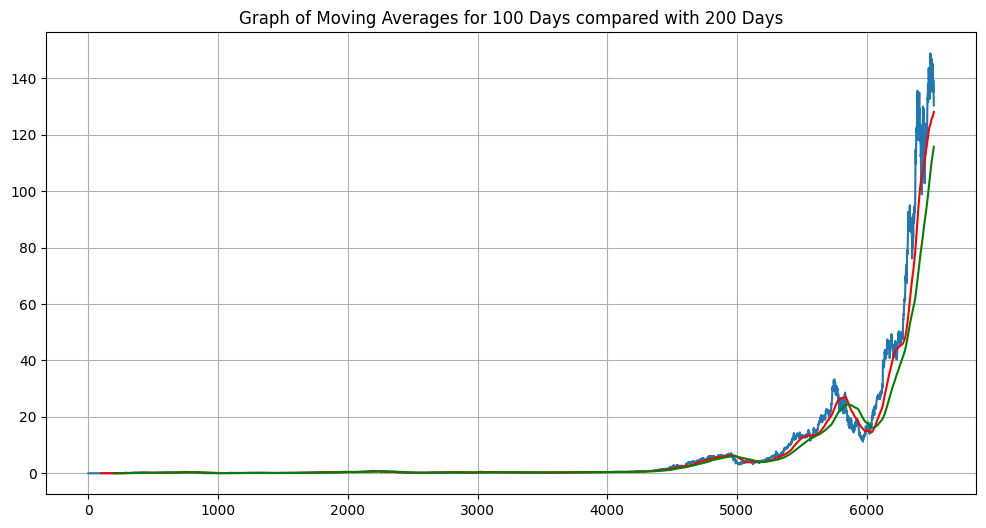

In [27]:
plt.figure(figsize=(12,6))
plt.plot(stockDF.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.grid(True)
plt.title('Graph of Moving Averages for 100 Days compared with 200 Days')
plt.show()

## Finding outliers

In [28]:
for col in stockDF.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate z-scores
        z_scores = stats.zscore(stockDF[col].dropna())
        z_scores_series = pd.Series(z_scores, index=stockDF[col].dropna().index)
        stockDF[f'{col}_is_outlier'] = 0 #the default is 0
        stockDF.loc[z_scores_series[abs(z_scores_series) > 3].index, f'{col}_is_outlier'] = 1 #I set if the z-score is greater than 3, then it could be an outlier

Above code helps find the outliers in the dataset and the newly created features

## Scaling Values

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

In [31]:
X = stockDF.drop(columns=['Close','dateParsed']) #removed date and the target
y = stockDF['Close']

feature_list = list(X.columns) # get a list of feature names

In [32]:
numeric_transformer = Pipeline(steps=[ #handles numeric features
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

In [33]:
preprocessor = ColumnTransformer(#main transformer
        transformers=[
            ('num', numeric_transformer, feature_list)
        ])

Can't use train test split because in time series, data needs to be in order, where in train test split, it is split randomly

In [46]:
train_size = 0.8 #80% train, 20% test

train_idx=int(len(X)*train_size)

X_train = X.iloc[:train_idx]
y_train = y.iloc[:train_idx]

X_test = X.iloc[train_idx:]
y_test = y.iloc[train_idx:]

## Baseline Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [ ]:
 param_grid = { #parameters for random forest
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None,30,35,40],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [2],
        'model__max_features': ['sqrt', 'log2', None]
    }

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
rf_grid_search = GridSearchCV( #used gridsearchcv  to run random forest model
    estimator=rf_model_pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

In [ ]:
rf_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Open',
                                                                          'High',
                                                                          'Low',
                                                                          'Volume',
                                                                          'Dividends',
                                                                          'Stock '
                                                                          'Splits',
                                                                          'STOCHk_14_3_3',
                                                                          'STOCHd_14_3_3',
                                                                          'RSI_14',
                                                                          'CMO_14',
                                                                          'CCI_14_0.015',
                                                                          'MACD_12_26_9',
                                                                          '...
                                                                          'BBL_5_2.0',
                                                                          'BBM_5_2.0',
                                                                          'BBU_5_2.0',
                                                                          'BBB_5_2.0',
                                                                          'BBP_5_2.0', ...])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#getting training metrics
train_pred = rf_grid_search.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)

#getting test metrics
test_pred = rf_grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)

In [ ]:
print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}, MAE: {train_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}, MAE: {test_mae:.4f}")

Train MSE: 5.3829, RMSE: 0.5837, R-squared: 0.9482, MAE: 0.7817
Test MSE: 13.4837, RMSE: 8.3847, R-squared: 0.9073, MAE: 7.3829


The stats above show that the mean squared error for both the train and test are decently low along with the RMSE and the MAE. The R-squared values are in the 90% or higher which can tell us that the model used was decent

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

In [ ]:
fig = go.Figure()

# Add Close line
fig.add_trace(go.Scatter(x=stockDF['Date'], y=stockDF['Close'],
                      name='Close Price', line=dict(color='blue')))

# Add Open line
fig.add_trace(go.Scatter(x=stockDF['Date'], y=stockDF['Open'],
                      name='Open', line=dict(color='orange')))


# sliders
fig.update_layout(
    title='Price with Technical Indicators',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    height=500, width=1000
)

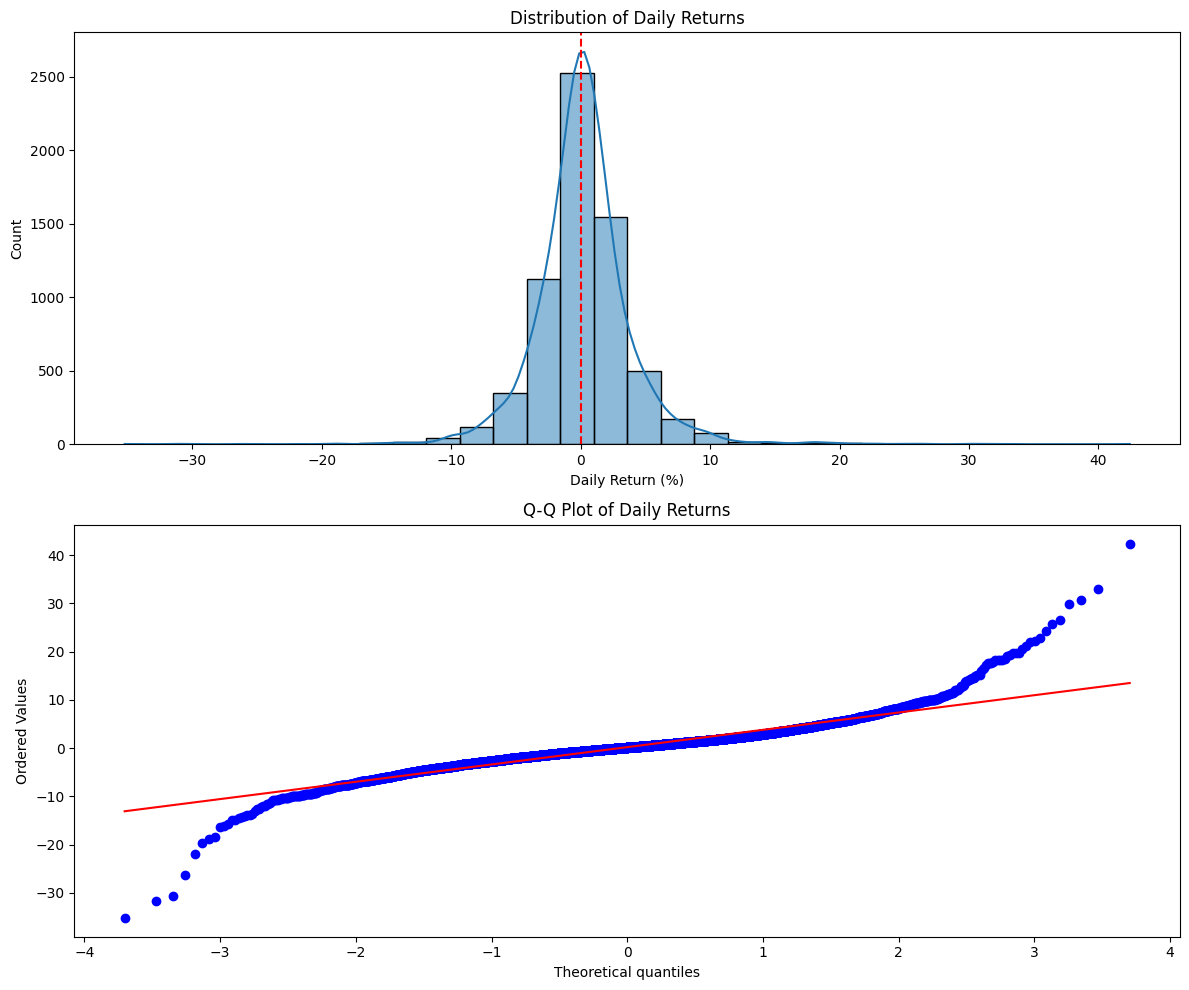

In [ ]:
stockDF['Returns'] = stockDF['Close'].pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Histogram
sns.histplot(stockDF['Returns'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Daily Returns')
axes[0].set_xlabel('Daily Return (%)')
axes[0].axvline(x=0, color='r', linestyle='--')

stats.probplot(stockDF['Returns'].dropna(), plot=axes[1])
axes[1].set_title('Q-Q Plot of Daily Returns')

plt.tight_layout()

In [ ]:
skew_value = stockDF['Returns'].skew()

print(f"Skewness: {skew_value:.2f}")

Skewness: 0.61


From the skewness value, we can determine that the distribution is right skewed since the value is >0. This can mean that there are many smaller returns but there are days where the returns are bigger, hence making the mean higher.

For the QQ Plot, we see that the points do follow the reference line for the most part which shows it is normally distributed, and then moving away at the ends. Since it moves away at the ends, it can indicate the volatility of the market

## LSTM

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
train = pd.DataFrame(stockDF[:int(len(stockDF)*0.80)])
test = pd.DataFrame(stockDF[int(len(stockDF)*0.80):])

In [36]:
train_close = train.iloc[:,3:4].values
test_close = test.iloc[:,3:4].values

In [37]:
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,volume_price_ratio_is_outlier,rsi_stoch_diff_is_outlier,rsi_stoch_ratio_is_outlier,bb_lower_dist_is_outlier,bb_upper_dist_is_outlier,bb_mid_dist_is_outlier,macd_crossover_is_outlier,macd_crossunder_is_outlier,rsi_overbought_is_outlier,rsi_oversold_is_outlier
5215,4.618216,4.661253,4.587119,4.640357,200040000,0.0,0.0,80.437467,70.010905,61.343935,...,0,0,0,0,0,0,0,0,0,0
5216,4.730663,4.957793,4.716732,4.885151,664124000,0.0,0.0,86.495785,79.559140,69.225755,...,0,0,0,0,0,0,0,0,0,0
5217,4.851069,4.956051,4.819972,4.831416,428944000,0.0,0.0,86.423405,84.452219,66.042475,...,0,0,0,0,0,0,0,0,0,0
5218,4.875947,4.920975,4.778925,4.833407,263436000,0.0,0.0,85.386585,86.101925,66.104677,...,0,0,0,0,0,0,0,0,0,0
5219,4.833903,4.866492,4.664489,4.738872,307440000,0.0,0.0,78.574787,83.461592,60.444000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,137.360001,140.169998,135.210007,139.309998,184905200,0.0,0.0,28.162572,36.724356,48.915180,...,1,0,0,0,0,0,0,0,0,0
6515,137.080002,138.440002,135.800003,137.339996,159211400,0.0,0.0,29.111055,30.127867,46.402587,...,1,0,0,0,0,0,0,0,0,0
6516,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0,29.485599,28.919742,42.697825,...,1,0,0,0,0,0,0,0,0,0
6517,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0,20.867842,26.488165,40.182117,...,1,0,0,0,0,0,0,0,0,0


In [38]:
data_train_array = scaler.fit_transform(train_close)

In [39]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
# !pip uninstall -y numpy tensorflow jax
# !pip install tensorflow
# !pip show numpy

In [40]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Code above created the LSTM model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
import tensorflow as tf

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 260ms/step - loss: 0.0781 - mean_absolute_error: 0.0801
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - loss: 0.0042 - mean_absolute_error: 0.0308
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 258ms/step - loss: 0.0013 - mean_absolute_error: 0.0212
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - loss: 0.0014 - mean_absolute_error: 0.0205
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - loss: 0.0012 - mean_absolute_error: 0.0194
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - loss: 0.0010 - mean_absolute_error: 0.0184
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 259ms/step - loss: 0.0011 - mean_absolute_error: 0.0191
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - loss: 0.0011 - mean_absolute_error: 0.0188
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - loss: 9.2553e-04 - mean_absolute_error: 0.0177
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - loss: 0.0010 - mean_absolute

In [63]:
past_100_days = pd.DataFrame(train_close[-100:])

In [64]:
test_df = pd.DataFrame(test_close)

In [65]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [66]:
final_df.head()

,0
0,3.778265
1,3.657122
2,3.603254
3,3.558072
4,3.483848


In [67]:
input_data = scaler.fit_transform(final_df)

In [68]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [69]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [70]:
y_pred = model.predict(x_test) #making predictions
y_pred.shape

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


(1304, 1)

In [71]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [72]:
train_pred = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)

160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step


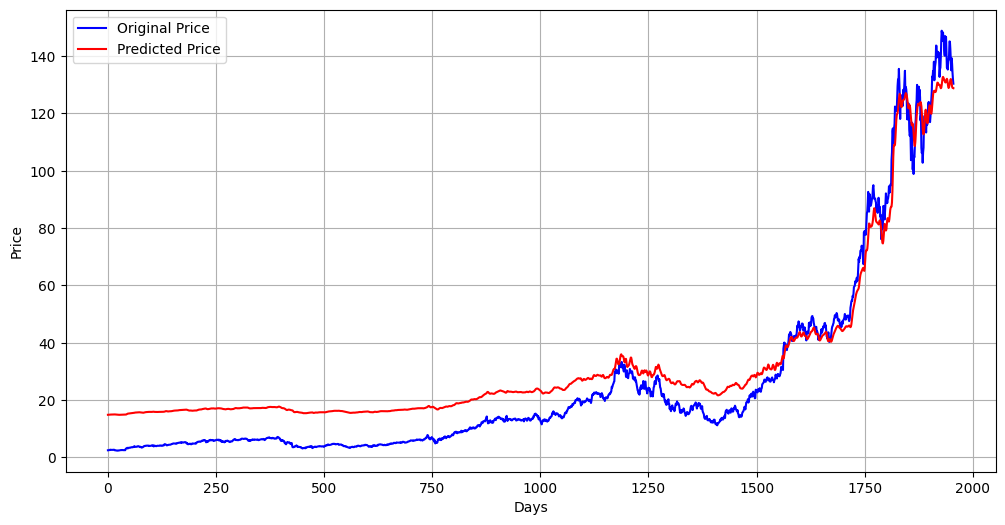

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [73]:
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(mse)
test_r2 = r2_score(y_test, y_pred)

In [74]:
print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}, MAE: {train_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}, MAE: {test_mae:.4f}")

Train MSE: 0.0048, RMSE: 0.0690, R-squared: 0.8961, MAE: 0.0664
Test MSE: 69.9454, RMSE: 8.7434, R-squared: 0.9495, MAE: 7.6175


From the above metrics using MAE, MSE, RMSE and r2 scores, we see decent values with a high r2 score which can indicate a decent model

## ARIMA

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
import shap
from xgboost.callback import EarlyStopping

In [35]:
train_data, test_data = stockDF[3:int(len(stockDF)*0.90)], stockDF[int(len(stockDF)*0.90):] #splitting data into train and test

In [36]:
X_train = train_data.drop(columns=['Close','dateParsed']) #getting rid of the date feature
y_train = train_data['Close'] #target

X_test = test_data.drop(columns=['Close','dateParsed']) #getting rid of the date feature
y_test = test_data['Close'] #target

In [37]:
xgb_model = XGBRegressor( #Choosing best features
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.03,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=1.2
)
xgb_model.fit(X_train, y_train) #fitting the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

In [39]:
shap_importance = pd.DataFrame({ #putting the features chosen from XGBoost into the dataframe and sorting it
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values).mean(0)
}).sort_values('Importance', ascending=False)



In [40]:
# Select top features for ARIMA
top_features = shap_importance.head(15)['Feature'].tolist()
top_features

['High',
 'Low',
 'OBV',
 'PSARs_0.02_0.2',
 'PSARl_0.02_0.2',
 'FWMA_10',
 'AD',
 'BBU_5_2.0',
 'EMA_10',
 'Open',
 'BBL_5_2.0',
 'BBM_5_2.0',
 'ISB_26',
 'IKS_26',
 'ITS_9']

Above shows us the top features that the XGBoost model has chosen for our ARIMA model

In [41]:
arima_features = stockDF[top_features] #creating new DF with only the top features chosen by XGBoost

In [42]:
target = stockDF['Close'] #target

In [43]:
scaler = MinMaxScaler(feature_range=(0,1)) #use minmaxscaler to scale the data
scaled_features = scaler.fit_transform(arima_features)

In [44]:
close_price_scaler = MinMaxScaler(feature_range=(0,1))
target = close_price_scaler.fit_transform(target.values.reshape(-1, 1)) #scaling the close prices

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    timeseries = pd.Series(timeseries.flatten())

    rollingmean = timeseries.rolling(12).mean()
    rollingstd = timeseries.rolling(12).std()

    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rollingmean, color='red', label='Rolling Mean')
    plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

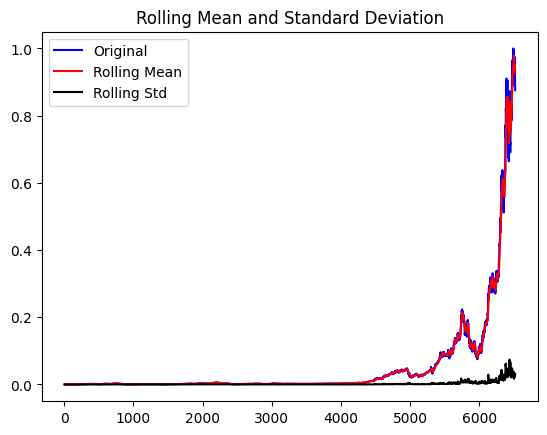

Results of dickey fuller test
Test Statistics                   5.540650
p-value                           1.000000
No. of lags used                 35.000000
Number of observations used    6483.000000
critical value (1%)              -3.431359
critical value (5%)              -2.861986
critical value (10%)             -2.567007
dtype: float64


In [ ]:
test_stationarity(target)

we see that the time series is not stationary as the mean and standard deviation continues to increase over time and doesn't stay at the same spot.

In [45]:
train_data, test_data = scaled_features[3:int(len(scaled_features)*0.80)], scaled_features[int(len(scaled_features)*0.80):] #splitting the data into train and test data. 80% train, 20% test

In [46]:
target_train, target_test = target[3:int(len(target)*0.80)], target[int(len(target)*0.80):]

In [1]:
# !pip uninstall -y numpy pandas scikit-learn scipy pmdarima
# !pip install numpy==1.24.3
# !pip install pandas scipy scikit-learn
# !pip install pmdarima

In [2]:
# !pip install --upgrade pmdarima

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import warnings

In [48]:
warnings.filterwarnings('ignore')

In [ ]:
model_autoARIMA = auto_arima(target_train, exog=train_data,
                           start_p=0, max_p=10,
                           start_q=0, max_q=10,
                           d=None, max_d=3,
                           m=1,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=False)  # exhaustive search

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-61101.268, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-61122.317, Time=1.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-61126.945, Time=1.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-61140.903, Time=0.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-61138.933, Time=1.91 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-61176.698, Time=2.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-61120.635, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-61121.084, Time=1.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-57495.229, Time=1.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-61147.672, Time=2.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-61128.322, Time=3.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-61129.764, Time=1.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-61095.113, Time=0.63 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-61129.269, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-61150

the autoARIMA function helps us gather the best order parameter for the ARIMA model. From the function, we found that the ideal order is 0,1,5

In [49]:
model_autoARIMA = ARIMA(target_train,exog=train_data,order=(0,1,5)) #used the order 0,1,5 from the autoARIMA function above
fitted = model_autoARIMA.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5212
Model:                 ARIMA(0, 1, 5)   Log Likelihood               40911.350
Date:                Wed, 28 May 2025   AIC                         -81780.700
Time:                        02:37:36   BIC                         -81642.971
Sample:                             0   HQIC                        -81732.529
                               - 5212                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4331      0.000   2434.572      0.000       0.433       0.433
x2             0.3830      0.000   1629.207      0.000       0.383       0.384
x3             0.0009      0.000      2.244      0.0

MSE: 42.846901354936165
MAE: 4.165435312236351
RMSE: 6.545754452691925
MAPE: 0.09387029171674306
R2: 0.9690770130157705


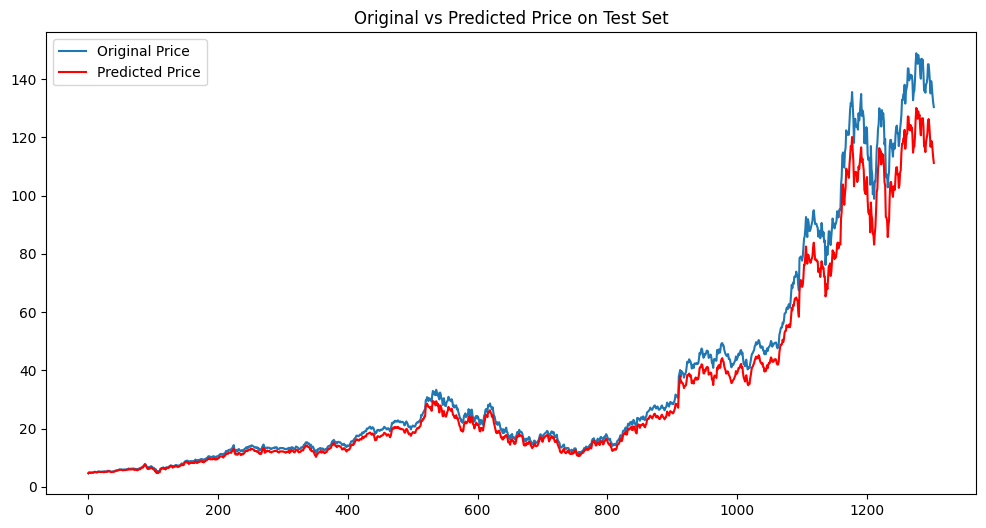

In [50]:

start_index = len(target_train)
end_index = len(target_train) + len(target_test) - 1

predicted_scaled = fitted.predict(start=start_index, end=end_index, exog=test_data[:len(target_test)]) #making the prediction

predicted_inverse = close_price_scaler.inverse_transform(predicted_scaled.reshape(-1, 1)) #reverse teh scaling that we did before
actual_inverse = close_price_scaler.inverse_transform(target_test.reshape(-1, 1)) #reverse the scaling that we did before

mse = mean_squared_error(actual_inverse, predicted_inverse)
print('MSE: '+str(mse))
mae = mean_absolute_error(actual_inverse, predicted_inverse)
print('MAE: '+str(mae))
rmse = math.sqrt(mse)
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predicted_inverse - actual_inverse)/np.abs(actual_inverse))
print('MAPE: '+str(mape))
r2 = r2_score(actual_inverse, predicted_inverse)
print('R2: '+str(r2))


#plotting the predicted prices
plt.figure(figsize=(12,6))
plt.plot(actual_inverse, label='Original Price')
plt.plot(predicted_inverse, color='red', label='Predicted Price')
plt.title('Original vs Predicted Price on Test Set')
plt.legend()
plt.show()

From the metrics and graph above, we observed a good MSE, MAE, and RMSE. We also observed a low MAPE score, which is the mean absolute percentage error. We also observed a high r2 score which makes this model good

In [68]:
import statsmodels.api as sm
from scipy.stats import gaussian_kde

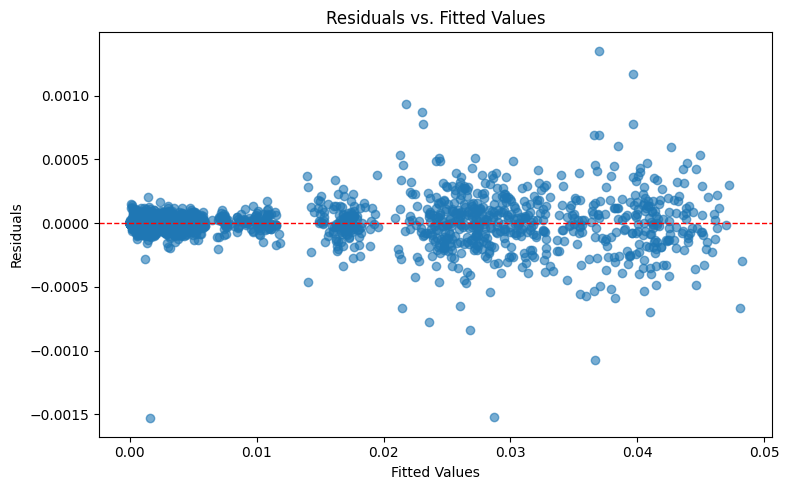

In [55]:
fitted_vals = fitted.fittedvalues
residuals  = fitted.resid

# make the scatter plot
plt.figure(figsize=(8,5))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

# labels and title
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")

plt.tight_layout()
plt.show()

We see that the data is pretty compacted near the zero, but there are some stragglers as the fitted values get bigger. The points get less dense but they are still dense together. This would say there possibly are a little outliers.

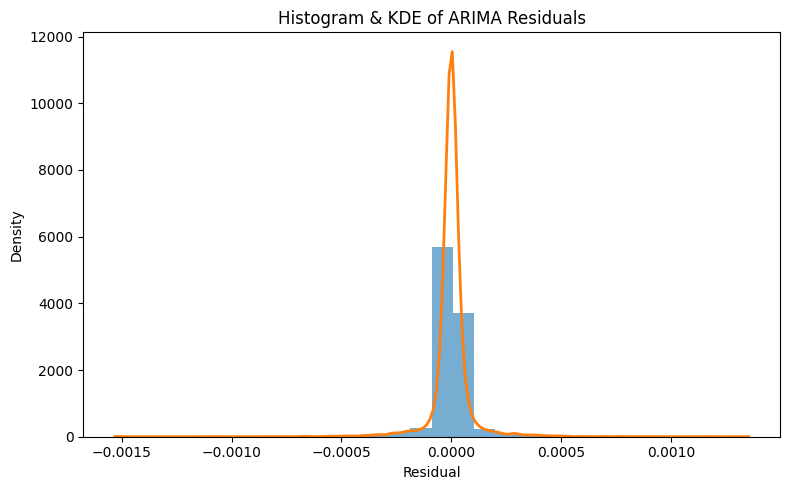

In [69]:
residuals = fitted.resid

# histogram
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, density=True, alpha=0.6)

# KDE
kde = gaussian_kde(residuals)
xs = np.linspace(residuals.min(), residuals.max(), 200)
plt.plot(xs, kde(xs), linewidth=2)
plt.title("Histogram & KDE of ARIMA Residuals")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.tight_layout()
plt.show()